# Visulizing The Far-Trans dataset for Financial Asset Recommendation

### Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Loading dataframes from csv

In [3]:
transactions_df = pd.read_csv('transactions.csv')
close_prices_df = pd.read_csv('close_prices.csv')
limit_prices_df = pd.read_csv('limit_prices.csv')
asset_info_df = pd.read_csv('asset_information.csv')
markets_df = pd.read_csv('markets.csv')
customer_info_df = pd.read_csv('customer_information.csv')

In [4]:
print(f'transactions_df duplicates: {transactions_df.duplicated().sum()}')
print(f'close_prices_df duplicates: {close_prices_df.duplicated().sum()}')
print(f'limit_prices_df duplicates: {limit_prices_df.duplicated().sum()}')
print(f'asset_info_df duplicates: {asset_info_df.duplicated().sum()}')
print(f'markets_df duplicates: {markets_df.duplicated().sum()}')
print(f'customer_info_df duplicates: {customer_info_df.duplicated().sum()}')

transactions_df duplicates: 0
close_prices_df duplicates: 0
limit_prices_df duplicates: 0
asset_info_df duplicates: 0
markets_df duplicates: 0
customer_info_df duplicates: 0


In [7]:
print(f'transactions_df nulls: \n{transactions_df.isna().sum()}')
print(f'close_prices_df nulls: \n{close_prices_df.isna().sum()}')
print(f'limit_prices_df nulls: \n{limit_prices_df.isna().sum()}')
print(f'asset_info_df nulls: \n{asset_info_df.isna().sum()}')
print(f'markets_df nulls: \n{markets_df.isna().sum()}')
print(f'customer_info_df nulls: {customer_info_df.isna().sum()}')


transactions_df nulls: 
customerID         0
ISIN               0
transactionID      0
transactionType    0
timestamp          0
totalValue         0
units              0
channel            0
marketID           0
dtype: int64
close_prices_df nulls: 
ISIN          0
timestamp     0
closePrice    0
dtype: int64
limit_prices_df nulls: 
ISIN             0
minDate          0
maxDate          0
priceMinDate     0
priceMaxDate     0
profitability    0
dtype: int64
asset_info_df nulls: 
ISIN                  0
assetName            24
assetShortName        1
assetCategory         0
assetSubCategory    269
marketID              0
sector              388
industry            439
timestamp             0
dtype: int64
markets_df nulls: 
exchangeID      0
marketID        0
name            0
description     0
country         0
tradingDays     0
tradingHours    1
marketClass     0
dtype: int64
customer_info_df nulls: customerID               0
customerType             0
riskLevel                0
invest

#### Customer info descriptions

In [5]:
display(customer_info_df.head())
customer_info_df.info()
customer_info_df.describe()


,customerID,customerType,riskLevel,investmentCapacity,lastQuestionnaireDate,timestamp
0,DED5BF19E23CCCFEE322,Premium,Balanced,CAP_80K_300K,2021-11-30,2021-03-19
1,DED5BF19E23CCCFEE322,Premium,Balanced,CAP_80K_300K,2021-11-30,2022-01-21
2,6C0C752E66D5F0486C71,Mass,Income,Predicted_CAP_LT30K,2015-04-27,2018-01-02
3,3E8D8E4E07CD3210F25F,Mass,Income,CAP_30K_80K,2021-11-03,2018-01-02
4,37F996EE2A69B5C15DF3,Mass,Predicted_Conservative,Predicted_CAP_LT30K,2000-01-01,2018-01-02


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32468 entries, 0 to 32467
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   customerID             32468 non-null  object
 1   customerType           32468 non-null  object
 2   riskLevel              32468 non-null  object
 3   investmentCapacity     32468 non-null  object
 4   lastQuestionnaireDate  32468 non-null  object
 5   timestamp              32468 non-null  object
dtypes: object(6)
memory usage: 1.5+ MB


,customerID,customerType,riskLevel,investmentCapacity,lastQuestionnaireDate,timestamp
count,32468,32468,32468,32468,32468,32468
unique,29090,5,9,9,1555,1167
top,26FE717B0D0ABFEF14B9,Mass,Income,CAP_LT30K,2000-01-01,2018-01-02
freq,9,19810,10048,14030,7275,15752


#### Transactions

In [6]:
transactions_df.head()

,customerID,ISIN,transactionID,transactionType,timestamp,totalValue,units,channel,marketID
0,00017496858921195E5A,GRS434003000,7590224,Buy,2020-03-27,11000.0,5000.0,Internet Banking,XATH
1,00017496858921195E5A,GRS434003000,7607029,Sell,2020-04-06,12080.0,5000.0,Internet Banking,XATH
2,00017496858921195E5A,GRS434003000,7634872,Buy,2020-04-24,13400.0,5000.0,Internet Banking,XATH
3,00017496858921195E5A,GRS434003000,7652627,Sell,2020-05-07,12700.0,5000.0,Internet Banking,XATH
4,00017496858921195E5A,GRS434003000,7664807,Buy,2020-05-15,12150.0,5000.0,Internet Banking,XATH


### Visualizing the top 10 traded securities

<Axes: xlabel='assetShortName'>

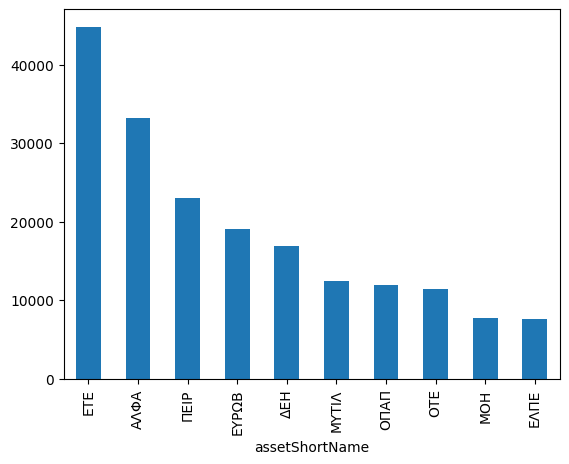

In [10]:
volume_df = pd.merge(transactions_df,asset_info_df[['ISIN','assetShortName', 'assetCategory']], on='ISIN', how='left')
top10_traded = volume_df['assetShortName'].value_counts()[:10]
top10_traded.plot(kind='bar')

In [11]:
closex_assets = close_prices_df.merge(asset_info_df[['ISIN', 'assetShortName']], on='ISIN', how='left')

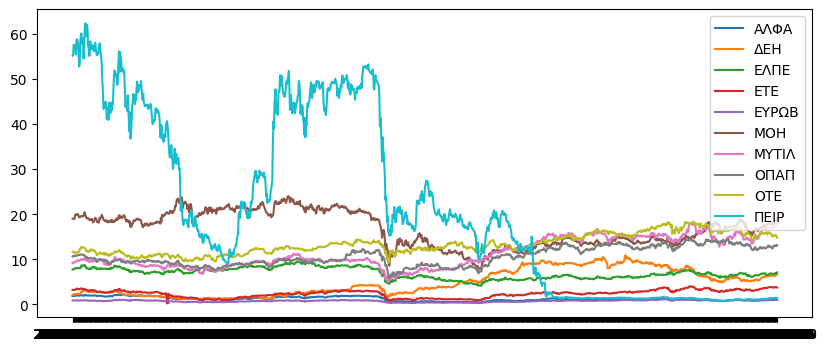

In [12]:
fig, ax = plt.subplots(figsize=(10,4))
top_assets_df = closex_assets[closex_assets['assetShortName'].isin(top10_traded.keys())]
for key,group in top_assets_df.groupby('assetShortName'):
    ax.plot(group['timestamp'], group['closePrice'], label=key)

plt.legend()
plt.show()

##### Viewing which asset type is mostly traded

In [13]:
transaction_asset_types = volume_df['assetCategory'].value_counts()
transaction_asset_types

assetCategory
Stock    347824
MTF       29666
Bond      25044
Name: count, dtype: int64

##### Getting the distribution of monthly transactions per asset category

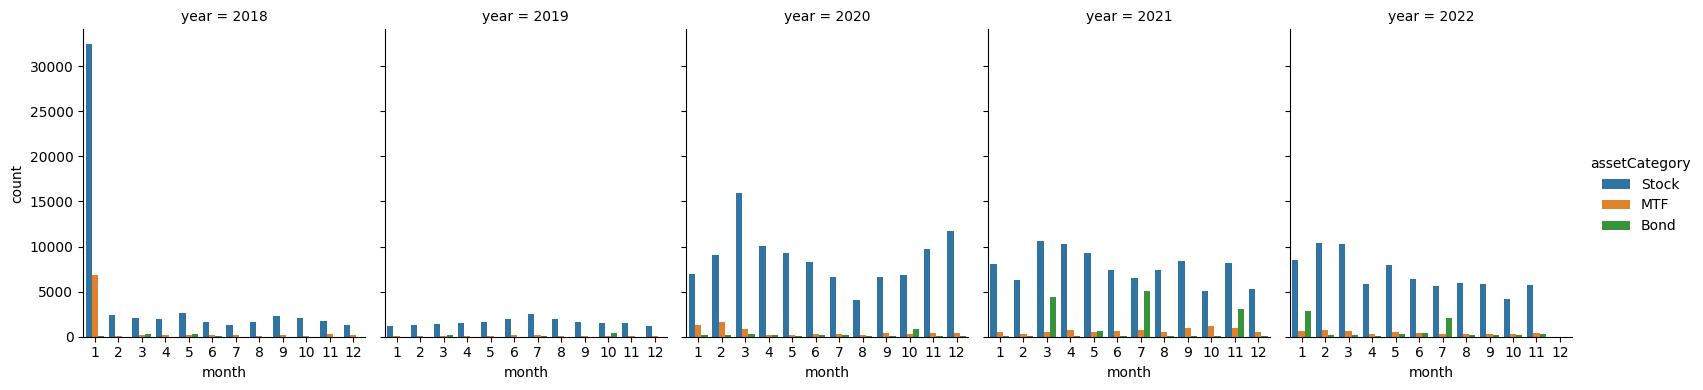

In [14]:
# converting the timestamp column to a datetime object to extract month and year
volume_df['timestamp'] = pd.to_datetime(volume_df['timestamp'])

df1 = volume_df.groupby([volume_df['timestamp'].dt.year.rename('year'), volume_df['timestamp'].dt.month.rename('month')])

# convert the groupby object back to a dataframe
grouped_df = df1['assetCategory'].value_counts().reset_index()


graph = sns.catplot(data=grouped_df,
                    x='month', 
                    y='count', 
                    col='year',
                    kind='bar',
                    hue='assetCategory',
                    height=4,
                    aspect=0.8)



#### Display the distribution of transactions by each customer type
- Mass: Majority of customers. Less than 60k euros on investments.
- Premium: Individual investor. More than 60k euros on investments.
- Professional: Sole proprietorship. Individual customer that exercises his financial activity without having created a legal person.
- Legal entity: legal entities with services within the bank.
- Inactive: Customers that cannot be identified in the previous categories.

<Axes: xlabel='customerType'>

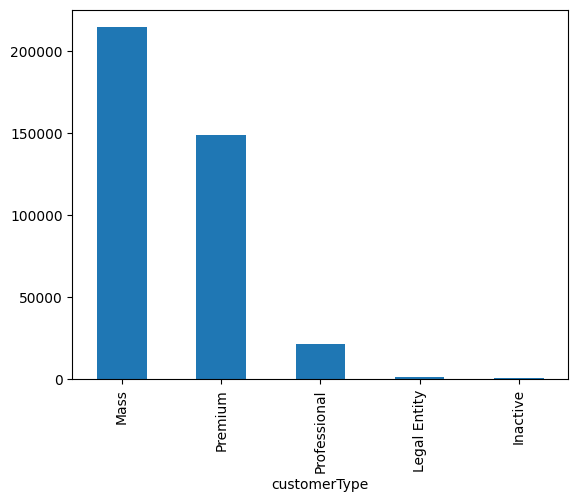

In [93]:
transactions_customers = transactions_df.merge(customer_info_df[['customerID', 'customerType']], on='customerID', how='left')
transactions_customers = transactions_customers.drop_duplicates()
transactions_customers['customerType'].value_counts().plot(kind='bar')

#### Assessing the volatility of the top 10 traded securities


In [ ]:
closex_assets['return'] = closex_assets.groupby('ISIN')['closePrice'].pct_change()
closex_assets['rolling_vol'] = closex_assets.groupby('ISIN')['return'].transform(
    lambda x: x.rolling(window=30).std() * np.sqrt(252)
)
closex_assets = closex_assets.dropna()


<Axes: xlabel='timestamp', ylabel='rolling_vol'>

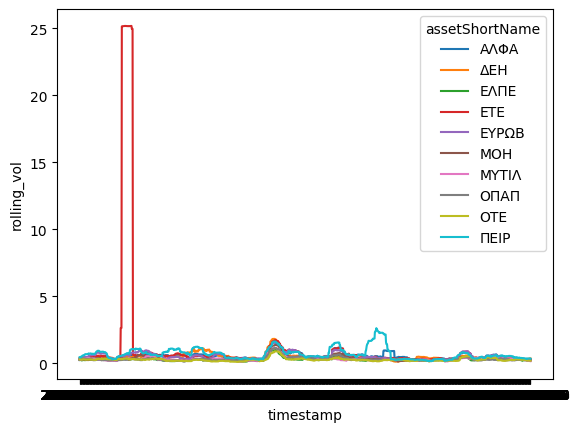

In [21]:
rolling = closex_assets.groupby(['timestamp', 'assetShortName'])['rolling_vol'].mean()
rolling = rolling.reset_index()
rolling_top10 = rolling[rolling['assetShortName'].isin(top10_traded.keys())]

sns.lineplot(data=rolling_top10, x='timestamp', y='rolling_vol', hue='assetShortName', legend=True)